# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [207]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [54]:
df= pd.read_csv('data/grades.csv')
df.loc[0,["國文"]]

國文    9
Name: 0, dtype: object

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

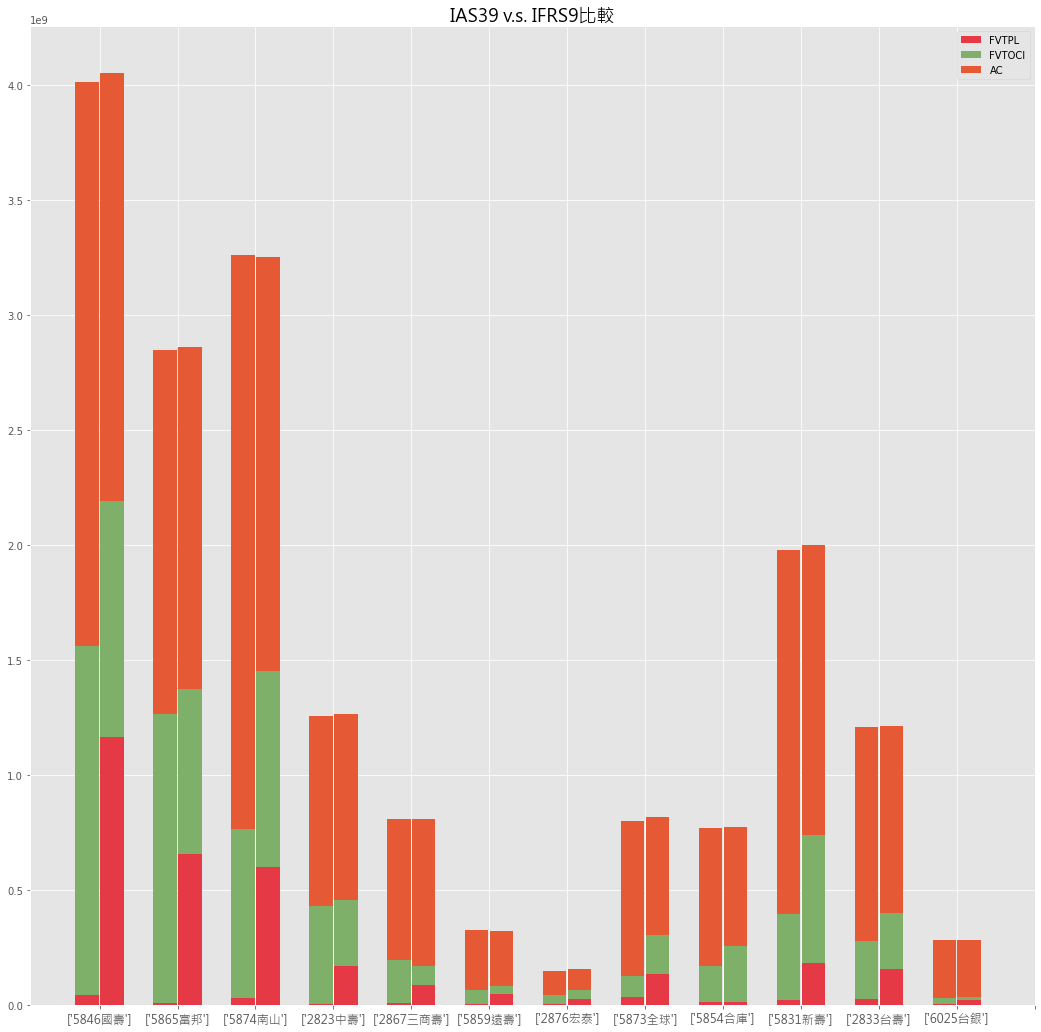

In [249]:
ias39=pd.read_excel('try.xlsx','IAS39')
ias39.set_index('Unnamed: 0')

ifrs9=pd.read_excel('try.xlsx','IFRS9')
ifrs9.set_index('Unnamed: 0')

company_name=ias39[['Unnamed: 0']]
ias39_FVTPL=ias39['FVTPL']
ias39_FVTOCI =ias39['FVTOCI']
ias39_AC = ias39['AC']

ifrs9_FVTPL=ifrs9['FVTPL']
ifrs9_FVTOCI=ifrs9['FVTOCI']
ifrs9_AC=ifrs9['AC']
x=np.arange(1,13)
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='data/微軟正黑體.ttf')
f, ax = plt.subplots(figsize=(18,18)) 
plt.title('IAS39 v.s. IFRS9比較',fontproperties=font,fontsize=18)
plt.bar(x-0.16, ias39_FVTPL, width=0.3,fc='#e63946',ec='none',label='FVTPL')
plt.bar(x-0.16,ias39_FVTOCI, width=0.3,fc='#7fb069',ec='none',bottom=ias39_FVTPL,label="FVTOCI")

plt.bar(x-0.16,ias39_AC, width=0.3,fc='#e55934',ec='none',bottom=ias39_FVTPL+ias39_FVTOCI,label="AC")


plt.bar(x+0.16,ifrs9_FVTPL, width=0.3,fc='#e63946',ec='none')
plt.bar(x+0.16,ifrs9_FVTOCI, width=0.3,fc='#7fb069',ec='none',bottom=ifrs9_FVTPL)
plt.bar(x+0.16,ifrs9_AC, width=0.3,fc='#e55934',ec='none',bottom=ifrs9_FVTPL+ifrs9_FVTOCI)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],ias39[['Unnamed: 0']].values.tolist(),fontproperties=font,fontsize=12)
plt.legend()


matplotlib.style.use('ggplot')
#fig, ax = plt.subplots()
#ias39.plot.bar(x='Unnamed: 0',stacked=True,width=0.3,colormap="Spectral",position=1,ax=ax,alpha=1,figsize=(20,30))
#ifrs9.plot.bar(x='Unnamed: 0',stacked=True,width=0.3,colormap="BrBG",position=2,ax=ax,alpha=1,figsize=(20,30))

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [19]:
df['國文']


0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [5]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33258 missing from c

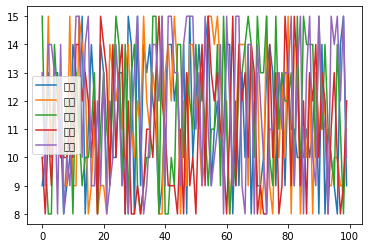

In [8]:
df.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

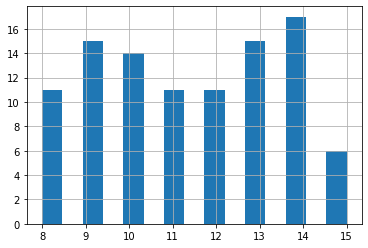

In [9]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [10]:
df.國文.mean()

11.39

算標準差。

In [11]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [12]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


只算兩科間的相關係數當然也可以。

In [13]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [55]:
df['總級分']=df.sum(axis=1)
df

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

In [57]:
df['加權']=df.國文+ df.英文+df.數學*2
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [58]:
df.sort_values(by='總級分',ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [59]:
df2=df.sort_values(by=['加權','總級分'],ascending=False)

In [34]:
df2.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
44,童心怡,13,13,14,8,13,61,54
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
4,崔靜成,13,12,14,12,13,64,53
67,林哲法,14,9,15,10,14,62,53


### 【重點】重設 index

In [60]:
df2.index=range(1,101)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,51,36
97,胡凱琳,10,8,9,9,15,51,36
98,林建亨,9,11,8,8,11,47,36
99,梁慧君,9,8,8,8,12,45,33


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [39]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [40]:
df2[df2.數學 & df2.英文==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [61]:
df2.drop('總級分',axis=1,inplace=True)


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [62]:
df2.drop('總級分',axis=1,inplace=True)


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [65]:
df2.drop(df2[df2.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

In [68]:
conda install pandas-datareader


Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    pandas-datareader-0.10.0   |     pyhd3eb1b0_0          71 KB
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.10.0-pyhd3eb1b0_0

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.11.0-py38hecd8cb5_0



pandas-datareader-0. | 71 KB     | ##################################### | 100% 
conda-4.11.0         | 14.4 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying tr

### 【例子】 分析 Apple 股價

In [76]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-19,30.022499,29.842501,29.850000,29.945000,102389200.0,28.186689
2017-01-20,30.112499,29.932501,30.112499,30.000000,130391600.0,28.238455
2017-01-23,30.202499,29.942499,30.000000,30.020000,88200800.0,28.257278
2017-01-24,30.025000,29.875000,29.887501,29.992500,92844000.0,28.231392
2017-01-25,30.525000,30.070000,30.105000,30.469999,129510400.0,28.680857
...,...,...,...,...,...,...
2022-01-11,175.179993,170.820007,172.320007,175.080002,76138300.0,175.080002
2022-01-12,177.179993,174.820007,176.119995,175.529999,74805200.0,175.529999
2022-01-13,176.619995,171.789993,175.779999,172.190002,84505800.0,172.190002


#### 只要最後 300 個交易日!

In [78]:
df = df.tail(300)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-09,121.989998,116.050003,120.500000,116.320000,154515300.0,115.607307
2020-11-10,117.589996,114.129997,115.550003,115.970001,138023400.0,115.259453
2020-11-11,119.629997,116.440002,117.190002,119.489998,112295000.0,118.757874
2020-11-12,120.529999,118.570000,119.620003,119.209999,103162300.0,118.479607
2020-11-13,119.669998,117.870003,119.440002,119.260002,81581900.0,118.529297
...,...,...,...,...,...,...
2022-01-11,175.179993,170.820007,172.320007,175.080002,76138300.0,175.080002
2022-01-12,177.179993,174.820007,176.119995,175.529999,74805200.0,175.529999
2022-01-13,176.619995,171.789993,175.779999,172.190002,84505800.0,172.190002


#### 20 日的移動平均

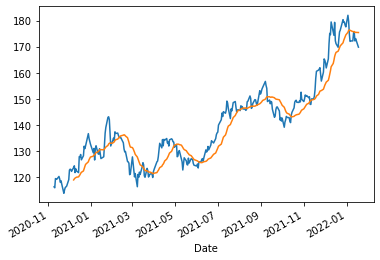

In [83]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

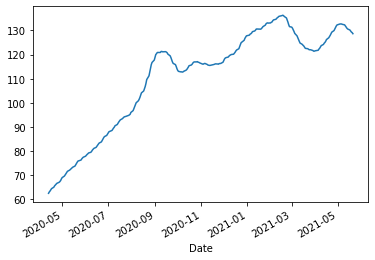

#### 20 日和 60 日的移動平均

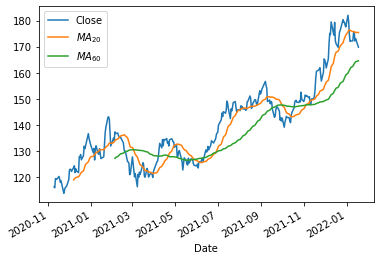

In [84]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [85]:
close = df.Close.values
close

array([116.31999969, 115.97000122, 119.48999786, 119.20999908,
       119.26000214, 120.30000305, 119.38999939, 118.02999878,
       118.63999939, 117.33999634, 113.84999847, 115.16999817,
       116.02999878, 116.58999634, 119.05000305, 122.72000122,
       123.08000183, 122.94000244, 122.25      , 123.75      ,
       124.37999725, 121.77999878, 123.23999786, 122.41000366,
       121.77999878, 127.87999725, 127.80999756, 128.69999695,
       126.66000366, 128.22999573, 131.88000488, 130.96000671,
       131.97000122, 136.69000244, 134.86999512, 133.72000122,
       132.69000244, 129.41000366, 131.00999451, 126.59999847,
       130.91999817, 132.05000305, 128.97999573, 128.80000305,
       130.88999939, 128.91000366, 127.13999939, 127.83000183,
       132.02999878, 136.86999512, 139.07000732, 142.91999817,
       143.16000366, 142.05999756, 137.08999634, 131.96000671,
       134.13999939, 134.99000549, 133.94000244, 137.38999939,
       136.75999451, 136.91000366, 136.00999451, 135.38

In [90]:
type(close)

numpy.ndarray

In [95]:
x=close[:-1]
y=close[1:]

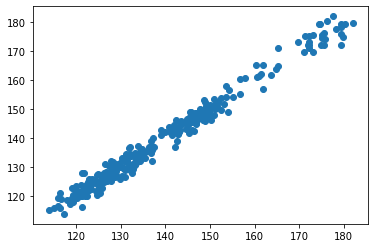

In [96]:
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [97]:
mydata = np.random.randn(4,3)

array([[-2.55231259,  1.90682379, -0.20156659],
       [ 1.01709617, -0.03222475, -0.37933992],
       [-0.25137135,  1.02654615,  2.26766347],
       [-0.06883999, -0.61168607,  0.17414026]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [98]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [99]:
df2

,A,B,C
0,0.091702,-0.641548,-1.842245
1,-0.232301,-0.567631,-0.118201
2,-0.193466,0.296266,1.164875
3,-0.106466,0.265807,0.772199


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [100]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [101]:
df3

,A,B,C
0,-0.685634,-0.068407,0.840478
1,-0.019102,0.533176,0.104765
2,-1.070209,0.821113,2.555021


In [105]:
df4=pd.concat([df2,df3],axis=0)

In [110]:
df4.index=range(len(df4))
df4

,A,B,C
0,0.091702,-0.641548,-1.842245
1,-0.232301,-0.567631,-0.118201
2,-0.193466,0.296266,1.164875
3,-0.106466,0.265807,0.772199
4,-0.685634,-0.068407,0.840478
5,-0.019102,0.533176,0.104765
6,-1.070209,0.821113,2.555021


前面我們弄得亂七八糟的 index 重設一下。

7

,A,B,C
0,-2.552313,1.906824,-0.201567
1,1.017096,-0.032225,-0.379340
2,-0.251371,1.026546,2.267663
3,-0.068840,-0.611686,0.174140
4,-0.171660,1.542380,2.685066
5,0.786684,-1.182996,0.401870
6,-2.216455,0.299553,-1.112735


#### 横向的貼

等等, 這大小好像不太對也可以嗎? 答案是可以的!

,A,B,C,A,B,C
0,-2.552313,1.906824,-0.201567,-0.171660,1.542380,2.685066
1,1.017096,-0.032225,-0.379340,0.786684,-1.182996,0.401870
2,-0.251371,1.026546,2.267663,-2.216455,0.299553,-1.112735
3,-0.068840,-0.611686,0.174140,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [133]:
l=list('abc')
df_names=pd.read_csv('data/names.csv',names=['姓名'])
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [135]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])
df_grades

,國文,英文,數學,社會,自然
0,13,12,10,8,8
1,7,6,14,10,9
2,12,15,9,7,7
3,10,15,11,12,15
4,13,15,13,10,8
...,...,...,...,...,...
95,9,14,8,13,10
96,9,12,13,13,9
97,12,14,8,14,13
98,6,14,10,13,11


,Unnamed: 0,國文,英文,數學,社會,自然
0,0,12,6,6,8,12
1,1,10,6,13,13,6
2,2,11,14,13,13,11
3,3,10,13,13,14,12
4,4,8,13,14,9,13
...,...,...,...,...,...,...
95,95,11,9,13,14,10
96,96,14,9,12,11,9
97,97,15,8,13,14,14
98,98,8,11,9,7,10


In [138]:
df_score= pd.concat([df_names,df_grades],axis=1)
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,13,12,10,8,8
1,王紹尹,7,6,14,10,9
2,黃季坤,12,15,9,7,7
3,許正書,10,15,11,12,15
4,張鈞蓮,13,15,13,10,8
...,...,...,...,...,...,...
95,陳君生,9,14,8,13,10
96,曾桂甫,9,12,13,13,9
97,林欣怡,12,14,8,14,13
98,林佳霖,6,14,10,13,11
